# Taller Individual 1:

In [329]:
import sympy as sy
import numpy as np
from IPython.display import display, Markdown ,  Math
import pprint as pp
import itertools 
import functools as ft
import scipy as sp
from matplotlib import pyplot as plt


Vars = ['V', 'I', 'B','K_V', 'mu_I', 'p', 'r_V' , 'a'] 


s_V, s_I , s_B,  s_Kv, s_mui, s_p, s_rv, s_a = sy.symbols(Vars)
#s_Pars totest can i use container instead of ind symbols?

In [330]:

fL_dvdt     = lambda V , I , B , Kv , mui , p , rv , a : rv *  V * ( 1 - V / Kv ) - B * V * I
fL_didt     = lambda V , I , B , Kv , mui , p , rv , a : p * V * B * I - mui * I
fA_dvdt     = lambda V , I , B , Kv , mui , p , rv , a : rv *  V * ( 1 - V / Kv )*( a - V ) - B * V * I 
fA_didt     = lambda V , I , B , Kv , mui , p , rv , a : p * V * B * I - mui * I

f_Log       = lambda V , I , B , Kv , mui , p , rv , a : [fL_dvdt( V , I , B , Kv , mui , p , rv , a) , fL_didt( V , I , B , Kv , mui , p , rv , a) ]
f_Allee     = lambda V , I , B , Kv , mui , p , rv , a : [fA_dvdt( V , I , B , Kv , mui , p , rv , a) , fA_didt( V , I , B , Kv , mui , p , rv , a) ]

In [331]:
#old                 s_B, s_I, s_Kv, s_V, s_mui, s_p, s_rv, s_a
fs_Log   =  f_Log   (s_V, s_I, s_B, s_Kv, s_mui, s_p, s_rv, s_a)
fs_Allee =  f_Allee (s_V, s_I, s_B, s_Kv, s_mui, s_p, s_rv, s_a)

In [332]:
eq_L = sy.solve(fs_Log,s_V,s_I)
eq_A = sy.solve(fs_Allee,s_V,s_I)

### Determinar el jacobiano de cada modelo

In [333]:
fsmj_Logis = sy.Matrix(fs_Log).jacobian([s_V,s_I])
fsmj_Allee = sy.Matrix(fs_Allee).jacobian([s_V,s_I])

### Evaluar la matriz jacobiana en cada punto de equilibrio
- sustituir V,I por equilibrios 
- calcular autovalores

In [334]:
dsub_Logis = map( lambda v :  { s_V : v[0] , s_I : v[1]  } , eq_L )
dsub_Allee = map( lambda v :  { s_V : v[0] , s_I : v[1]  } , eq_A )

ev_Logis = [list(d.keys()) for d in map(lambda s : fsmj_Logis.subs(s).eigenvals(),dsub_Logis) ]
ev_Allee = [list(d.keys()) for d in map(lambda s : fsmj_Allee.subs(s).eigenvals(),dsub_Allee) ]


### mostrar resultados
punto de equilibrio, autovalores asociados y multiplicidad

# Equilibrio $(V,I)$ : autovalores 

## Modelo Logístico 

Punto equilibiro:


Autovalores:


Punto equilibiro:


Autovalores:


Punto equilibiro:


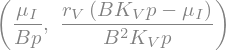

Autovalores:


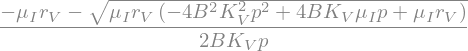

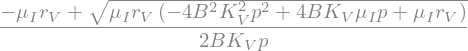

## Modelo Allee 

Punto equilibiro:


Autovalores:


Punto equilibiro:


Autovalores:


Punto equilibiro:


Autovalores:


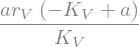

Punto equilibiro:


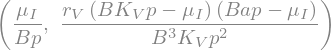

Autovalores:


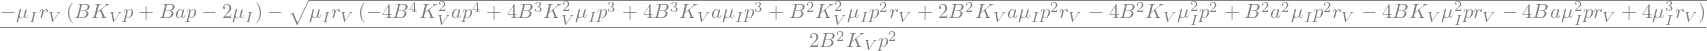

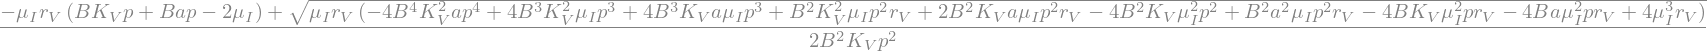

In [335]:
#list(map ( lambda eq,ev : display( eq, *list(ev.keys() ))   , eq_L, ev_Logis ) )
display(Markdown(r'# Equilibrio $(V,I)$ : autovalores '))

sy.init_printing()

display(Markdown(r'## Modelo Logístico '))
for eq, ev in zip(eq_L,ev_Logis)   :
   print("Punto equilibiro:")
   display(eq)
   print("Autovalores:")
   display(*map(sy.simplify,ev))

display(Markdown(r'## Modelo Allee '))
for eq, ev in zip(eq_A,ev_Allee)   :
   print("Punto equilibiro:")
   display(eq) 
   print("Autovalores:")
   display(*map(sy.simplify,ev))
 

## Simulaciones
- parametros
- reemplazar cond iniciales
- calcular soluciones
- dibujar

Por la naturaleza del problema tiene sentido suponer que todos los parámetros son definidos positivos, por esto solo se tienen en cuenta los puntos con autovalores que tengan parte imaginaria o que sean negativos.

### Modelo logístico:
- $(K_V , 0)$
- $(\frac{\mu_I}{Bp}, \frac{r_VBK_Vp - \mu_I}{B^2K_Vp})$
### Modelo Allee:
- $(K_V , 0)$
- $(a, 0)$
- $ (\frac{\mu_I}{Bp}, \frac{r_V(BK_Vp - \mu_I)(Bap - \mu_I)}{B^3K_V*p^2}) $

In [336]:
p_B     = 0.001
p_K_v   = 10.0
p_mu_I  = 1.0
p_p     = 1.5
p_rv    = 2
p_a     = 5

psd_Logis ={
    s_B     :   p_B,
    s_Kv    :   p_K_v,
    s_mui   :   p_mu_I,
    s_p     :   p_p,
    s_rv    :   p_rv,
    s_a     :   p_a,
}

#eqv_L = [(eq[0].subs(psd_Logis),eq[1].subs(psd_Logis)) for eq in eq_L]

In [337]:
p_B     = 0.001
p_K_v   = 10.0
p_mu_I  = 1.0
p_p     = 0.5
p_rv    = 0.1
p_a     = 5

fp_Logis = ft.partial(f_Log  , B = p_B , Kv = p_K_v , mui = p_mu_I , p = p_p , rv =p_rv , a = p_a )
fp_Allee = ft.partial(f_Allee, B = p_B , Kv = p_K_v , mui = p_mu_I , p = p_p , rv =p_rv , a = p_a )

fw_Logis = lambda t, Y : fp_Logis(Y[0],Y[1])
fw_Allee = lambda t, Y : fp_Allee(Y[0],Y[1])


# Logístico:

## (Kv , 0)


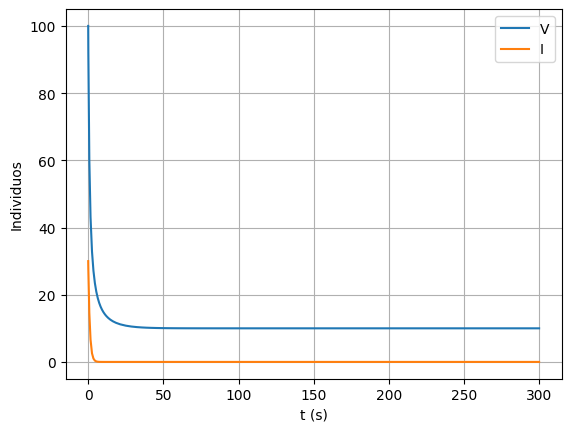

In [338]:
#parametros
p_B     = 0.001
p_K_v   = 10.0
p_mu_I  = 1.0
p_p     = 0.5
p_rv    = 0.1
p_a     = 5

fp_Logis = ft.partial(f_Log  , B = p_B , Kv = p_K_v , mui = p_mu_I , p = p_p , rv =p_rv , a = p_a )
fp_Allee = ft.partial(f_Allee, B = p_B , Kv = p_K_v , mui = p_mu_I , p = p_p , rv =p_rv , a = p_a )

fw_Logis = lambda t, Y : fp_Logis(Y[0],Y[1])
fw_Allee = lambda t, Y : fp_Allee(Y[0],Y[1])

#graficar
p_init = [100,30]
st1 = sp.integrate.solve_ivp(fw_Logis, (0,300) , p_init )
plt.plot(st1.t,st1.y[0], label = "V")
plt.plot(st1.t,st1.y[1], label = "I")
plt.grid('on')
plt.legend(loc="best")
plt.xlabel("t (s)")
plt.ylabel("Individuos")
plt.show()

## $(\frac{\mu_I}{Bp}, \frac{r_VBK_Vp - \mu_I}{B^2K_Vp})$

Para obtener soluciones complejas es necesario que algún valor sea igual a $0$ pero anteriormente se asumió que todos los valores eran definidos positivos por lo que no se considera este caso.
(análisis realizado mediante wolframalpha)

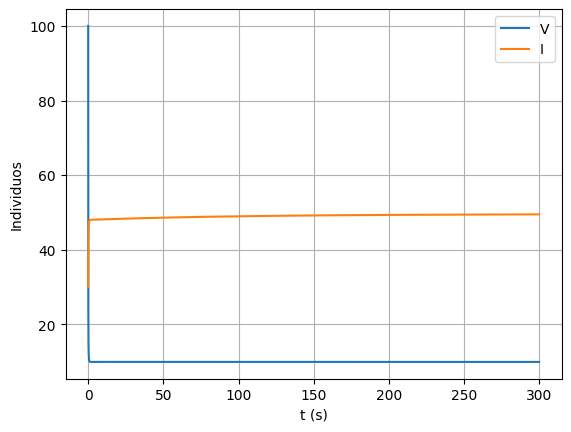

In [343]:
# (Kv , 0)
#parametros
p_B     = 0.001
p_K_v   = 10.0
p_mu_I  = 1.0
p_p     = p_mu_I /(p_B*p_K_v) +1
p_rv    = 5
p_a     = 5

fp_Logis = ft.partial(f_Log  , B = p_B , Kv = p_K_v , mui = p_mu_I , p = p_p , rv =p_rv , a = p_a )
fp_Allee = ft.partial(f_Allee, B = p_B , Kv = p_K_v , mui = p_mu_I , p = p_p , rv =p_rv , a = p_a )

fw_Logis = lambda t, Y : fp_Logis(Y[0],Y[1])
fw_Allee = lambda t, Y : fp_Allee(Y[0],Y[1])

#graficar
p_init = [100,30]
st1 = sp.integrate.solve_ivp(fw_Logis, (0,300) , p_init )
plt.plot(st1.t,st1.y[0], label = "V")
plt.plot(st1.t,st1.y[1], label = "I")
plt.grid('on')
plt.legend(loc="best")
plt.xlabel("t (s)")
plt.ylabel("Individuos")
plt.show()

# Allee:
## (Kv , 0)


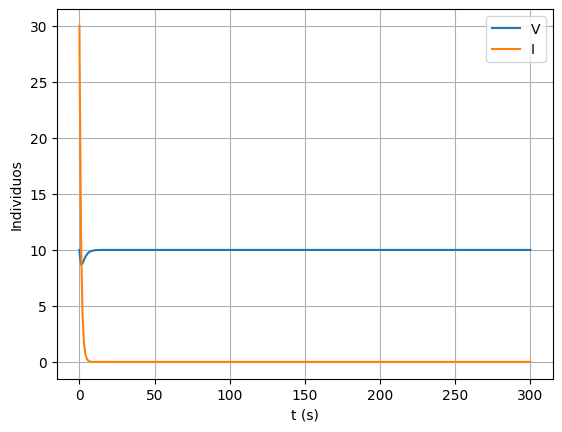

In [340]:
#parametros
p_B     = 0.01
p_K_v   = 10.0
p_mu_I  = 1.0
p_p     = 0.5
p_rv    = 0.1
p_a     = 15

fp_Logis = ft.partial(f_Log  , B = p_B , Kv = p_K_v , mui = p_mu_I , p = p_p , rv =p_rv , a = p_a )
fp_Allee = ft.partial(f_Allee, B = p_B , Kv = p_K_v , mui = p_mu_I , p = p_p , rv =p_rv , a = p_a )

fw_Logis = lambda t, Y : fp_Logis(Y[0],Y[1])
fw_Allee = lambda t, Y : fp_Allee(Y[0],Y[1])

#graficar
p_init = [10,30]
st1 = sp.integrate.solve_ivp(fw_Allee, (0,300) , p_init )
plt.plot(st1.t,st1.y[0], label = "V")
plt.plot(st1.t,st1.y[1], label = "I")
plt.grid('on')
plt.legend(loc="best")
plt.xlabel("t (s)")
plt.ylabel("Individuos")
plt.show()

## $(a, 0)$

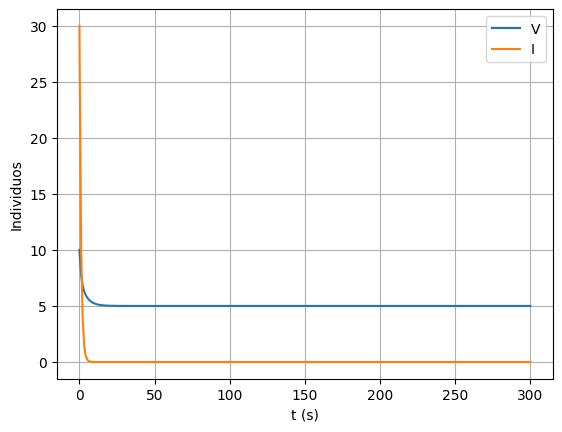

In [341]:
#parametros
p_B     = 0.01
p_K_v   = 10.0
p_mu_I  = 1.0
p_p     = 0.5
p_rv    = 0.1
p_a     = 5

fp_Logis = ft.partial(f_Log  , B = p_B , Kv = p_K_v , mui = p_mu_I , p = p_p , rv =p_rv , a = p_a )
fp_Allee = ft.partial(f_Allee, B = p_B , Kv = p_K_v , mui = p_mu_I , p = p_p , rv =p_rv , a = p_a )

fw_Logis = lambda t, Y : fp_Logis(Y[0],Y[1])
fw_Allee = lambda t, Y : fp_Allee(Y[0],Y[1])

#graficar
p_init = [10,30]
st1 = sp.integrate.solve_ivp(fw_Allee, (0,300) , p_init )
plt.plot(st1.t,st1.y[0], label = "V")
plt.plot(st1.t,st1.y[1], label = "I")
plt.grid('on')
plt.legend(loc="best")
plt.xlabel("t (s)")
plt.ylabel("Individuos")
plt.show()

## $ (\frac{\mu_I}{Bp}, \frac{r_V(BK_Vp - \mu_I)(Bap - \mu_I)}{B^3K_V*p^2}) $

No alcancé a determinar si este equilibrio tiene autovalores complejos (oscila) ni las condiciones para llegar a este.


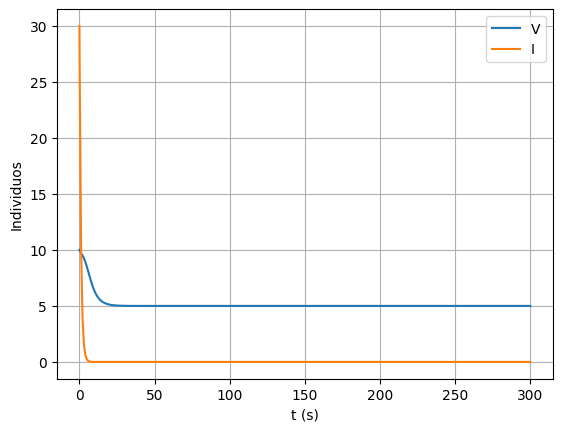

In [342]:
#parametros
p_B     = 0.001
p_K_v   = 10.0
p_mu_I  = 1.0
p_p     = 0.5
p_rv    = 0.1
p_a     = 5

fp_Logis = ft.partial(f_Log  , B = p_B , Kv = p_K_v , mui = p_mu_I , p = p_p , rv =p_rv , a = p_a )
fp_Allee = ft.partial(f_Allee, B = p_B , Kv = p_K_v , mui = p_mu_I , p = p_p , rv =p_rv , a = p_a )

fw_Logis = lambda t, Y : fp_Logis(Y[0],Y[1])
fw_Allee = lambda t, Y : fp_Allee(Y[0],Y[1])

#graficar
p_init = [10,30]
st1 = sp.integrate.solve_ivp(fw_Allee, (0,300) , p_init )
plt.plot(st1.t,st1.y[0], label = "V")
plt.plot(st1.t,st1.y[1], label = "I")
plt.grid('on')
plt.legend(loc="best")
plt.xlabel("t (s)")
plt.ylabel("Individuos")
plt.show()

### Apreciaciones personales:

Me parecen interesantes porque aunque "pierden" mucha información simulan muy bien el comportamiento deseado siempre y cuando los parámetros se ajusten adecuadamente; creo que esta puede ser la  mayor limitación en su utilidad: hallar parámetros buenos y demostar que lo son.
También me acordé de algunas aplicaciones que leí alguna vez sobre análisis p-ádico y creo que puede ser una herramienta útil para complementar estos análisis porque realizar aproximaciones en p-ádicos es aparentemente más sencillo por forma en que una norma p-ádica permite aproximar valores, sin embargo no me acuerdo mucho del tema, recuerdo que me gustó bastante y la dificultad con el último punto de equilibrio del sistema Allee (ver si el determinante en algún punto es negativo  o ver si la parte por fuera de la raíz es suficientemente negativa) me llevó a recordar ese tema.